Basic Statistics:
       distance_km    weight_kg  shipping_cost  cost_per_km  cost_per_kg
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000
mean   1560.474000  1714.176000    1685.062920     1.263940     1.152612
std     810.811826   704.446593     641.103797     0.524381     0.681313
min     200.000000   501.000000     297.920000     0.776900     0.334484
25%     848.000000  1114.500000    1156.642500     0.954601     0.666458
50%    1544.000000  1671.500000    1682.625000     1.080331     0.987710
75%    2263.000000  2303.250000    2192.235000     1.368779     1.404712
max    2999.000000  2996.000000    3117.640000     4.848481     4.141556


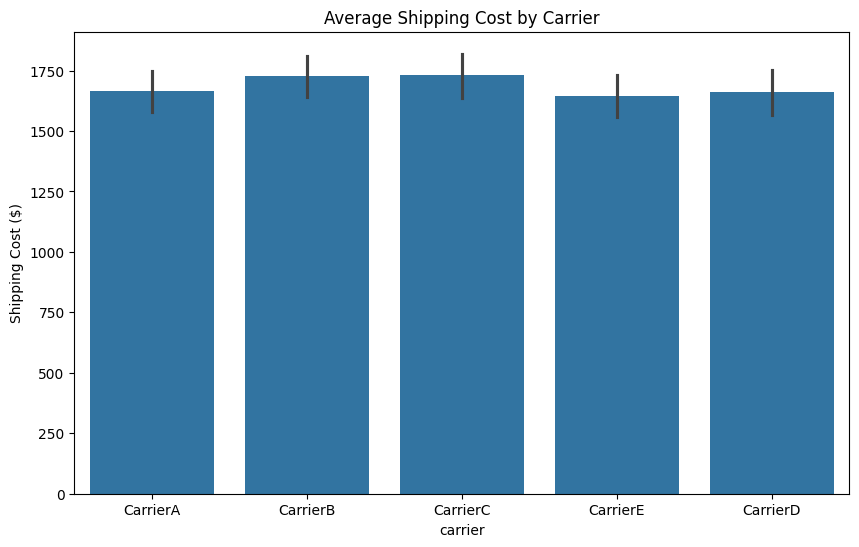

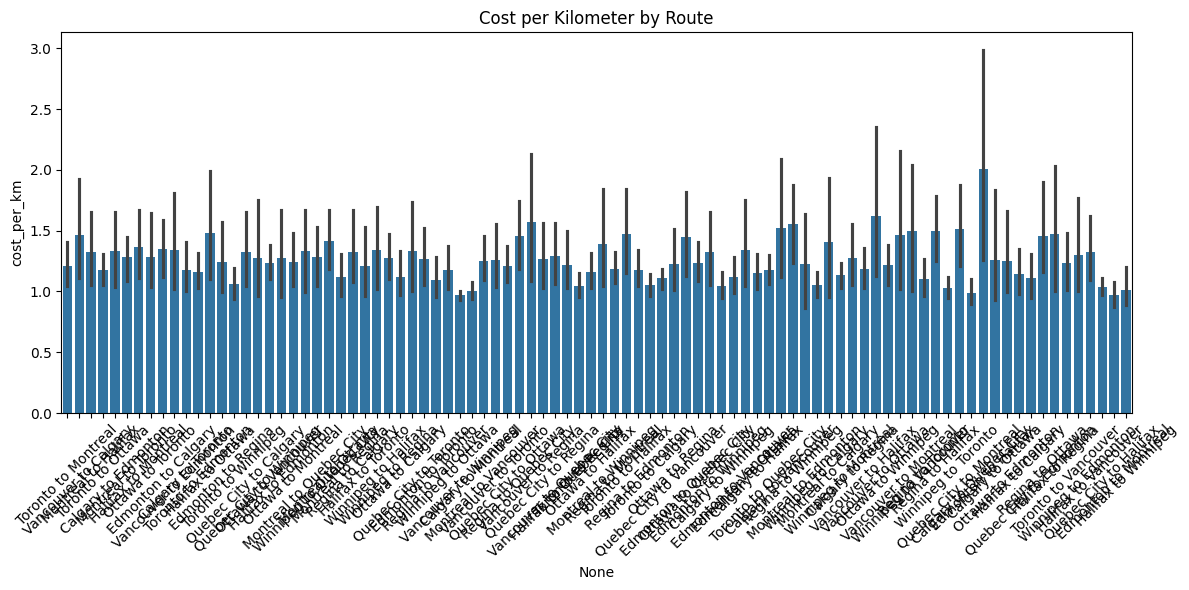


Most Expensive Routes (by cost per km):
       origin destination  cost_per_km
10   Edmonton     Halifax     2.011363
76  Vancouver      Ottawa     1.620868
78  Vancouver      Regina     1.568439
62     Regina    Winnipeg     1.556456
7     Calgary   Vancouver     1.519249

Cheapest Carrier for Each Route:
       origin  destination   carrier  shipping_cost
0     Calgary     Edmonton  CarrierB    1126.190000
6     Calgary      Halifax  CarrierD    1362.592500
11    Calgary     Montreal  CarrierE    1471.086667
15    Calgary       Ottawa  CarrierE    1902.035000
19    Calgary  Quebec City  CarrierE    1972.060000
..        ...          ...       ...            ...
377  Winnipeg       Ottawa  CarrierE    1563.830000
380  Winnipeg  Quebec City  CarrierC     739.265000
386  Winnipeg       Regina  CarrierE    1168.473333
387  Winnipeg      Toronto  CarrierA    1423.676667
393  Winnipeg    Vancouver  CarrierC    1347.720000

[90 rows x 4 columns]


In [16]:
# 1_data_analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("../data/shipping_data.csv")

# Add calculated columns
data['cost_per_km'] = data['shipping_cost'] / data['distance_km']
data['cost_per_kg'] = data['shipping_cost'] / data['weight_kg']

# Basic statistics
print("Basic Statistics:")
print(data.describe())

# Visualize shipping costs by carrier
plt.figure(figsize=(10, 6))
sns.barplot(x='carrier', y='shipping_cost', data=data)
plt.title('Average Shipping Cost by Carrier')
plt.ylabel('Shipping Cost ($)')
plt.savefig('../results/carrier_costs.png')
plt.show()

# Visualize cost per km by route
plt.figure(figsize=(12, 6))
routes = data['origin'] + ' to ' + data['destination']
sns.barplot(x=routes, y='cost_per_km', data=data)
plt.title('Cost per Kilometer by Route')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/route_costs.png')
plt.show()

# Find the most expensive routes
print("\nMost Expensive Routes (by cost per km):")
route_costs = data.groupby(['origin', 'destination'])['cost_per_km'].mean().reset_index()
print(route_costs.sort_values('cost_per_km', ascending=False).head())

# Find the cheapest carrier for each route
print("\nCheapest Carrier for Each Route:")
cheapest_carriers = data.groupby(['origin', 'destination', 'carrier'])['shipping_cost'].mean().reset_index()
cheapest_carriers = cheapest_carriers.loc[cheapest_carriers.groupby(['origin', 'destination'])['shipping_cost'].idxmin()]
print(cheapest_carriers[['origin', 'destination', 'carrier', 'shipping_cost']])


In [17]:
import pandas as pd 

Basic Statistics:
       distance_km    weight_kg  shipping_cost  cost_per_km  cost_per_kg
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000
mean   1560.474000  1714.176000    1685.062920     1.263940     1.152612
std     810.811826   704.446593     641.103797     0.524381     0.681313
min     200.000000   501.000000     297.920000     0.776900     0.334484
25%     848.000000  1114.500000    1156.642500     0.954601     0.666458
50%    1544.000000  1671.500000    1682.625000     1.080331     0.987710
75%    2263.000000  2303.250000    2192.235000     1.368779     1.404712
max    2999.000000  2996.000000    3117.640000     4.848481     4.141556


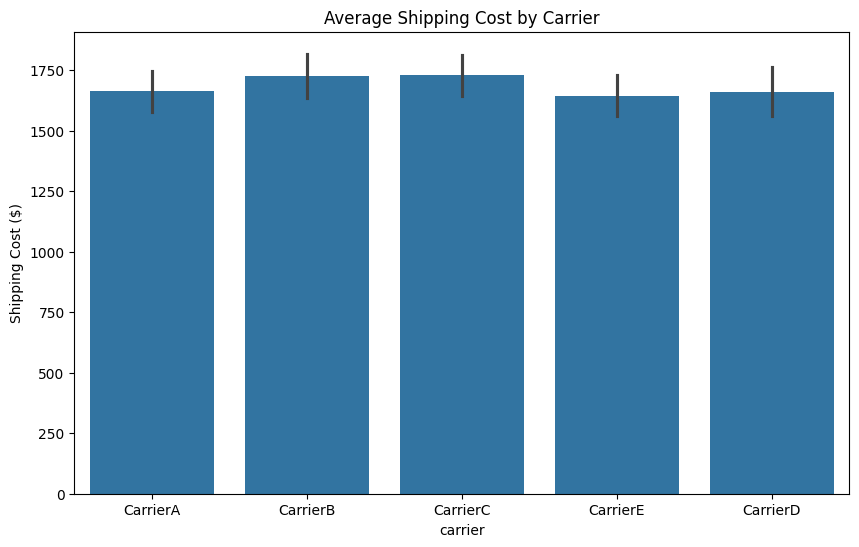

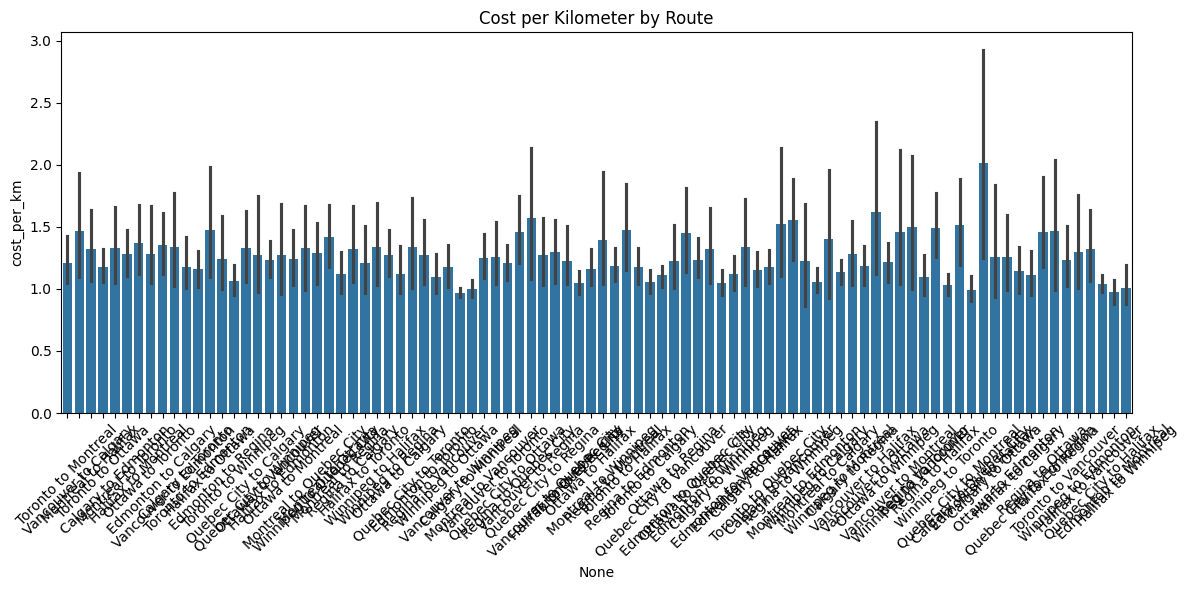


Most Expensive Routes (by cost per km):
       origin destination  cost_per_km
10   Edmonton     Halifax     2.011363
76  Vancouver      Ottawa     1.620868
78  Vancouver      Regina     1.568439
62     Regina    Winnipeg     1.556456
7     Calgary   Vancouver     1.519249

Cheapest Carrier for Each Route:
       origin  destination   carrier  shipping_cost
0     Calgary     Edmonton  CarrierB    1126.190000
6     Calgary      Halifax  CarrierD    1362.592500
11    Calgary     Montreal  CarrierE    1471.086667
15    Calgary       Ottawa  CarrierE    1902.035000
19    Calgary  Quebec City  CarrierE    1972.060000
..        ...          ...       ...            ...
377  Winnipeg       Ottawa  CarrierE    1563.830000
380  Winnipeg  Quebec City  CarrierC     739.265000
386  Winnipeg       Regina  CarrierE    1168.473333
387  Winnipeg      Toronto  CarrierA    1423.676667
393  Winnipeg    Vancouver  CarrierC    1347.720000

[90 rows x 4 columns]


In [18]:
# 1_data_analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../data/shipping_data.csv')

# Add calculated columns
data['cost_per_km'] = data['shipping_cost'] / data['distance_km']
data['cost_per_kg'] = data['shipping_cost'] / data['weight_kg']

# Basic statistics
print("Basic Statistics:")
print(data.describe())

# Visualize shipping costs by carrier
plt.figure(figsize=(10, 6))
sns.barplot(x='carrier', y='shipping_cost', data=data)
plt.title('Average Shipping Cost by Carrier')
plt.ylabel('Shipping Cost ($)')
plt.savefig('../results/carrier_costs.png')
plt.show()

# Visualize cost per km by route
plt.figure(figsize=(12, 6))
routes = data['origin'] + ' to ' + data['destination']
sns.barplot(x=routes, y='cost_per_km', data=data)
plt.title('Cost per Kilometer by Route')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/route_costs.png')
plt.show()

# Find the most expensive routes
print("\nMost Expensive Routes (by cost per km):")
route_costs = data.groupby(['origin', 'destination'])['cost_per_km'].mean().reset_index()
print(route_costs.sort_values('cost_per_km', ascending=False).head())

# Find the cheapest carrier for each route
print("\nCheapest Carrier for Each Route:")
cheapest_carriers = data.groupby(['origin', 'destination', 'carrier'])['shipping_cost'].mean().reset_index()
cheapest_carriers = cheapest_carriers.loc[cheapest_carriers.groupby(['origin', 'destination'])['shipping_cost'].idxmin()]
print(cheapest_carriers[['origin', 'destination', 'carrier', 'shipping_cost']])
